In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload train.csv and test.csv from your system


Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (1460, 81)
Test shape: (1459, 80)


In [ ]:
missing = train.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [ ]:
# Drop columns with too many missing values (e.g., Alley, PoolQC)
train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

# Fill numerical missing values with median
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
train[num_cols] = train[num_cols].fillna(train[num_cols].median())

# Fill categorical missing values with mode
cat_cols = train.select_dtypes(include=['object']).columns
train[cat_cols] = train[cat_cols].fillna(train[cat_cols].mode().iloc[0])


In [ ]:
# Total square footage
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

# Age of house when sold
train['Age'] = train['YrSold'] - train['YearBuilt']


In [ ]:
# Convert categorical columns to dummy variables
train = pd.get_dummies(train, drop_first=True)

# Visualizing correlation with SalePrice
corr = train.corr()
top_corr_features = corr['SalePrice'].sort_values(ascending=False).head(10)



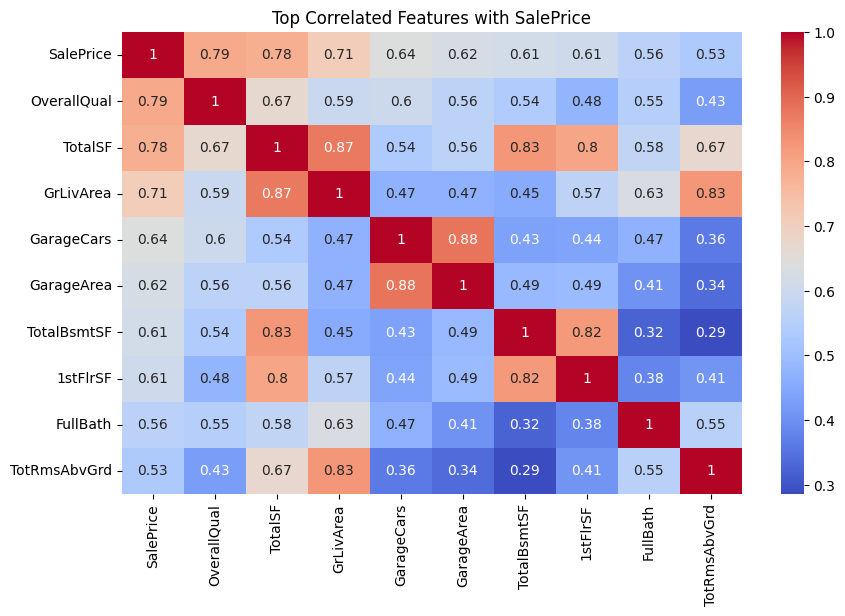

In [ ]:
# Plot heatmap of top correlated features
plt.figure(figsize=(10, 6))
sns.heatmap(train[top_corr_features.index].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")
plt.show()